In [1]:
# p 10/17

# 1. Introduction aux attaques par canaux auxiliaires

## 1.1 - Définition

Les **attaques par canaux auxiliaires** ou *(Side-Channel Attacks ou **SCA**)* sont des **attaques passives** et
**non-invasives** où l’attaquant va **observer** et **mesurer** les caractéristiques **analogiques de l’implémentation
logicielle ou matérielle d’un algorithme de chiffrement**, afin d’extraire la clé de chiffrement. Les principales caractéristiques analogiques utilisées en SCA sont le **temps d’exécution**, la **consommation
électrique** et les **émissions électromagnétiques**. [\[2\]](https://link.springer.com/book/10.1007/978-0-387-77993-5) [\[3\]](https://link.springer.com/book/10.1007/978-0-387-38162-6).

## 1.2 - AES

Advanced Encryption Standard *(**AES**)* [\[3\]](https://link.springer.com/book/10.1007/978-3-662-04722-4) [\[4\]](http://csrc.nist.gov/publications/fips/fips197/fips-197.pdf) est un algorithme de **chiffrement symétrique par blocs**, dérivé de la famille d'algorithmes de *Rijndael*, qui utilise différentes tailles de clés et de blocs. AES est utilisé en $3$ versions différentes, **AES-128** *($10$ rondes)*, **AES-192** *($12$ rondes)* et **AES-256** *($14$ rondes)* qui utilisent respectivement une **taille de clé de $128$, $192$ et $256$** bits ainsi qu'une **taille de blocs de $128$ bits**.


### 1.2.1 - Rappel fonctionnement AES

À chaque ronde, une clé distincte, nommée **Round Key** *($K_i$)*, est utilisée, et toutes ces clés sont dérivées
de la clé secrète $K$.

> **_NOTE:_**  La première et dernière ronde diffèrent des autres.

<center>
<img src="images/AESRounds.png"
     alt="Rondes AES-128"
     style="" 
     width="200"
     height="auto"/>
</center>

#### 1.2.1.1 - AddRoundKey

Chaque bits du bloc de données en cours de chiffrement est $XOR$ avec la clé de la ronde $(Ki)$.

<br>
<center>
<img src="images/aes_addroundkey.svg.png"
     alt="Operation AddRoundKey"
     style="" 
     width="300"
     height="auto"/>
</center>

#### 1.2.1.2 - SubBytes

**Substitution non linéaire** où chaque octet de l’état est remplacé par un autre octet selon une table de correspondance *(table de substitution ou **S-box**)*. Cette substitution renforce la **diffusion** des données.

<br>
<center>
<img src="images/aes_subbytes.png"
     alt="Operation AddRoundKey"
     style="" 
     width="300"
     height="auto"/>
</center>

#### 1.2.1.3 - ShiftRows

Effectue une **transposition cyclique** des lignes de l’état. La première ligne reste inchangée, la deuxième est décalée d’un octet vers la gauche, la troisième de deux octets, et la quatrième de trois octets. Cela contribue à la **confusion** en modifiant l’ordre des données.

<br>
<center>
<img src="images/aes_shiftrowssvg.png"
     alt="Operation AddRoundKey"
     style="" 
     width="350"
     height="auto"/>
</center>


#### 1.2.1.4 - MixColumns

Opération de mélange linéaire sur les colonnes du bloc. Chaque colonne est multipliée par la matrice hexadécimal $4 \times 4$ fixe suivante:

$$
C = \begin{bmatrix}
    02 & 03 & 01 & 01\\
    01 & 02 & 03 & 01\\
    01 & 01 & 02 & 03\\
    03 & 01 & 01 & 02
    \end{bmatrix}
$$

<br>
<center>
<img src="images/aes_mixcolumns.png"
     alt="Operation AddRoundKey"
     style="" 
     width="300"
     height="auto"/>
</center>

#### 1.2.1.5 - Vecteur d'Initialisation

Un **vecteur d’initialisation** *($IV$)* est utilisé dans AES comme pour la majorité des systèmes de chiffrement par blocs. Son utilisation permet d’obtenir deux chiffrés *($C$)* différents à partir du même texte clair *($P$)* à condition de ne jamais réutiliser le même $IV$ avec une clé identique. À noter que l’utilisation d’un $IV$ sur un $P > 128$, nécessitera un seul vecteur d’initialisation pour l’ensemble des blocs.

#### 1.2.1.5 - S-box

La **Rijndael S-box** *(**S-box**)* est une méthode permettant d’ajouter de la non-linéarité dans le processus de chiffrement de AES utilisée lors de l’opération $SubBytes()$. **S-box est une table de substitution** de taille $16 \times 16$ permettant de transformer n’importe quelle valeur codée sur $8$ bits en une autre valeur.

In [2]:
import numpy as np

AES_Sbox = np.array([
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
])

#### 1.2.1.6 - Modes d’opérations

AES découpe le message en blocs de taille 128 bits, il est donc nécessaire de chaîner les blocs entre eux afin de garantir l’**intégrité** du message. Il existe plusieurs modes de chaînage *(**CBC**, **CFB**, **OFB**)*. Dans ce lab, nous allons nous concentrer sur **CBC**.

<ins>Chiffrement avec le mode à CBC:
<br>
<center>
<img src="images/CBCChiffrement.png"
     alt="Chiffrement CBC"
     style="" 
     width="500"
     height="auto"/>
</center>


<ins>Déchiffrement avec le mode CBC:
<br>
<center>
<img src="images/CBCDechiffrement.png"
     alt="Dechiffrement CBC"
     style="" 
     width="500"
     height="auto"/>
</center>

### 1.2.2 - Attaques par canaux auxiliaires pour AES



# 2 - Introduction au Deep Learning

## 2.2 - CNN



## 2.3 - RNN



# 3 - DLSCA (Deep Learning-based Side-channel Analysis)

## 3.1 - Definition

## 3.2 - ASCAD

### 3.2.1 - Setup

In [3]:
# Installation des librairies nécessaires pour ASCAD
!pip install numpy h5py matplotlib tqdm tensorflow keras

In [4]:
import os
import h5py
import json
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import platform

In [5]:
if "macOS" in platform.platform():
    !brew install python-tk

==> Downloading https://formulae.brew.sh/api/formula.jws.json
==> Downloading https://formulae.brew.sh/api/cask.jws.json
To reinstall 3.13.3, run:
  brew reinstall python-tk@3.13


In [6]:
folder_name = "ASCAD"

if not os.path.exists(folder_name):
    !git clone https://github.com/ANSSI-FR/ASCAD.git
else:
    print(f"Folder '{folder_name}' already exists. Skipping git clone.")

Cloning into 'ASCAD'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 109 (delta 12), reused 9 (delta 9), pack-reused 88 (from 1)
Receiving objects: 100% (109/109), 178.25 KiB | 1.70 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [10]:
file_path = "ASCAD_data.zip"

if not os.path.exists(file_path):
    # !wget https://files.data.gouv.fr/anssi/ascadv2/ascadv2-extracted.h5
    !wget https://www.data.gouv.fr/s/resources/ascad/20180530-163000/ASCAD_data.zip
    !unzip ASCAD_data.zip
else:
    print(f"Folder '{file_path}' already exists. Skipping download.")

--2025-04-24 21:48:58--  https://www.data.gouv.fr/s/resources/ascad/20180530-163000/ASCAD_data.zip
Resolving www.data.gouv.fr (www.data.gouv.fr)... 37.59.183.73, 37.59.183.91
Connecting to www.data.gouv.fr (www.data.gouv.fr)|37.59.183.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4435199469 (4.1G) [application/zip]
Saving to: ‘ASCAD_data.zip’

ASCAD_data.zip      100%[===================>]   4.13G  15.1MB/s    in 3m 25s  

2025-04-24 21:52:23 (20.6 MB/s) - ‘ASCAD_data.zip’ saved [4435199469/4435199469]

Archive:  ASCAD_data.zip
   creating: ASCAD_data/
   creating: ASCAD_data/ASCAD_databases/
  inflating: ASCAD_data/ASCAD_databases/ASCAD.h5  
  inflating: ASCAD_data/ASCAD_databases/ASCAD_desync100.h5  
  inflating: ASCAD_data/ASCAD_databases/ASCAD_desync50.h5  
  inflating: ASCAD_data/ASCAD_databases/ATMega8515_raw_traces.h5  
   creating: ASCAD_data/ASCAD_trained_models/
  inflating: ASCAD_data/ASCAD_trained_models/cnn_best_ascad_desync0_epochs75_classes

### 3.2.2 - Chargement des données et des modèles (CNN, MLD)

In [12]:
trained_models_file1 = "./ASCAD_data/ASCAD_trained_models/cnn_best_ascad_desync0_epochs75_classes256_batchsize200.h5"
trained_models_file2 = "./ASCAD_data/ASCAD_trained_models/cnn_best_ascad_desync100_epochs75_classes256_batchsize200.h5"
database_file1 = "./ASCAD_data/ASCAD_databases/ASCAD.h5"
database_file2 = "./ASCAD_data/ASCAD_databases/ATMega8515_raw_traces.h5"

trained_models_h5_1 = h5py.File(trained_models_file1, "r")
trained_models_h5_2 = h5py.File(trained_models_file2, "r")
database_file_h5_1 = h5py.File(database_file1, "r")
database_file_h5_2 = h5py.File(database_file2, "r")

### 3.2.3 - Définitions des paramètres d'entraînement et de tests

Définition des paramètres pour entraîner un nouveau modèle:
- ascad_database: Chemin d'accès au fichier h5 contenant les traces;
- training_model: Chemin d'accès pour stocker le fichier h5 décrivant le model;
- network_type: Type de réseau de neurone utilisé (CNN ou MLP);
- epochs: Nombre d'epochs;
- batch_size: Taille du batch;

Définition des paramètres pour tester notre modèle:
- model_file: Chemin d'accès au fichier h5 décrivant le model;
- ascad_database: Chemin d'accès au fichier h5 contenant les traces;
- num_traces: Nombre de traces utilisées pour tester;
- save_file: Chemin d'accès pour stocker le graphe correspondant à l'efficacité de notre modèle;

In [14]:
training_parameters_new_model: dict = {"ascad_database": "ASCAD_data/ASCAD_databases/ASCAD.h5",
                             "training_model": "models/h5/newModelTest.h5",
                             "network_type": "mlp",
                             "epochs": 800,
                             "batch_size": 100}

testing_parameters_new_model: dict = {"model_file": "models/h5/newModelTest.h5",
                            "ascad_database": "ASCAD_data/ASCAD_databases/ASCAD.h5",
                            "num_traces": 1000,
                            "save_file": "models/plots/plot_new_model.png"}

# More information on the keys: https://github.com/ANSSI-FR/ASCAD/tree/master?tab=readme-ov-file#testing-the-trained-models
testing_parameters_mld: dict = {"model_file": "ASCAD_data/ASCAD_trained_models/mlp_best_ascad_desync0_node200_layernb6_epochs200_classes256_batchsize100.h5",
                            "ascad_database": "ASCAD_data/ASCAD_databases/ASCAD.h5",
                            "num_traces": 2000,
                            "save_file": "models/plots/plot_test_model_mld_desync0.png"}

testing_parameters_cnn: dict = {"model_file": "ASCAD_data/ASCAD_trained_models/cnn_best_ascad_desync0_epochs75_classes256_batchsize200.h5",
                            "ascad_database": "ASCAD_data/ASCAD_databases/ASCAD.h5",
                            "num_traces": 2000,
                            "save_file": "models/plots/plot_test_model_cnn_desync0.png"}

with open('models/txt/training/training_parameters_new_model.txt', 'w') as training_file:
     training_file.write(json.dumps(training_parameters_new_model))

with open('models/txt/testing/testing_parameters_new_model.txt', 'w') as training_file:
     training_file.write(json.dumps(testing_parameters_new_model))

with open('models/txt/testing/testing_parameters_mld.txt', 'w') as testing_file:
     testing_file.write(json.dumps(testing_parameters_mld))

with open('models/txt/testing/testing_parameters_cnn.txt', 'w') as testing_file:
     testing_file.write(json.dumps(testing_parameters_cnn))

### 3.2.4 - Entraînement d'un modèle

In [11]:
if not os.path.exists("models/h5/newModelTest.h5"):
    !python3 ASCAD/ASCAD_train_models.py models/txt/training/training_parameters_new_model.txt
else:
    print("Model already trained")
    train_model: str = input("Do you want to train again? [y/N]") or "N"
    if train_model.lower() == "y":
        !python3 ASCAD/ASCAD_train_models.py models/txt/training/training_parameters_new_model.txt

Model already trained


Do you want to train again? [y/N] 


### 3.2.5 - Test d'un modèle

In [8]:
%matplotlib inline
plt.close('all')
%run ASCAD/ASCAD_test_models.py models/txt/testing/testing_parameters_new_model.txt

b
Full path: /Users/gaetan/Documents/M1/ADL/s2/M1_S2_ADL/DLSPA/models/h5/newModelTest.h5
File exists: True
models/plots/plot_new_model.png
Full path: /Users/gaetan/Documents/M1/ADL/s2/M1_S2_ADL/DLSPA/models/h5/newModelTest.h5
File exists: True
Model file:  models/h5/newModelTest.h5
Model weights found in file
File keys: ['model_weights', 'optimizer_weights']
3.11.0
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Computing rank for targeted byte 2


/Users/gaetan/Documents/M1/ADL/s2/M1_S2_ADL/DLSPA/ASCAD/ASCAD_test_models.py:330: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show(block=False)


Press enter to exit ... 


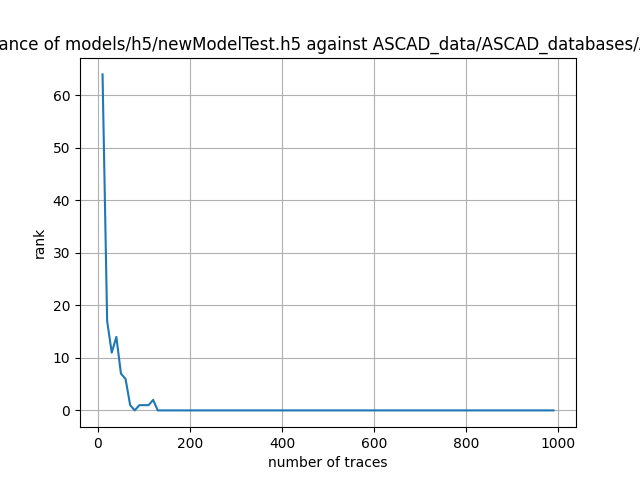

In [9]:
from IPython.display import Image
Image(filename='models/plots/plot_new_model.png') 